In [ ]:
import pandas as pd
df = pd.read_csv("pre.csv")


In [ ]:
df = df.drop("UDI", axis = 1)
df = df.drop("Product ID", axis = 1)

df = df.drop("Failure Type", axis = 1)

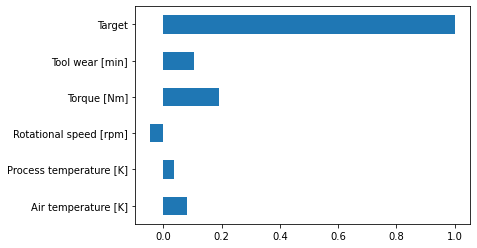

In [ ]:
import matplotlib.pyplot as plt
df2 = df.corr()["Target"].plot(kind="barh")


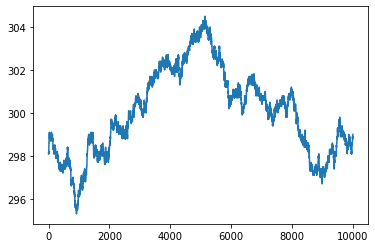

In [ ]:
df["Air temperature [K]"].plot()

In [ ]:
degistir = {'L': 0, 'M': 1, 'H': 2}
df['Type'] = df['Type'].map(degistir)


In [ ]:
y = df["Target"].values
x = df.drop("Target",axis=1).values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=10)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from tensorflow import keras
model = Sequential()

model.add(Dense(12,activation="relu"))

model.add(Dense(6,activation="relu"))

model.add(Dense(6,activation="relu"))

model.add(Dense(6,activation="relu"))

model.add(Dense(1,activation="sigmoid"))
#bu kod bloğu çok katmanlı yapay sinir ağının oluşturan kod bloğudur


from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss="binary_crossentropy",optimizer = "adam", metrics=["accuracy"])
erkendurma = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=30)
model2 = model.fit(x=x_train, y=y_train, epochs = 5, validation_data = (x_test,y_test), verbose = 1, callbacks=[erkendurma])


Epoch 1/5
282/282 [==============================] - 3s 5ms/step - loss: 0.2165 - accuracy: 0.9660 - val_loss: 0.1519 - val_accuracy: 0.9670
Epoch 2/5
282/282 [==============================] - 1s 3ms/step - loss: 0.1519 - accuracy: 0.9660 - val_loss: 0.1471 - val_accuracy: 0.9670
Epoch 3/5
282/282 [==============================] - 1s 4ms/step - loss: 0.1441 - accuracy: 0.9660 - val_loss: 0.1411 - val_accuracy: 0.9670
Epoch 4/5
282/282 [==============================] - 1s 3ms/step - loss: 0.1349 - accuracy: 0.9660 - val_loss: 0.1318 - val_accuracy: 0.9670
Epoch 5/5
282/282 [==============================] - 1s 3ms/step - loss: 0.1227 - accuracy: 0.9660 - val_loss: 0.1249 - val_accuracy: 0.9670


In [ ]:
loss = model.history.history["loss"]
a = model.history.history

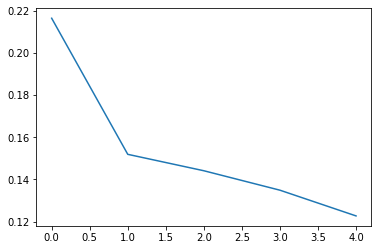

In [ ]:
import seaborn as sbn
sbn.lineplot(x=range(len(loss)),y=loss)

In [ ]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)
testLoss = model.evaluate(x_test,y_test,verbose=0)


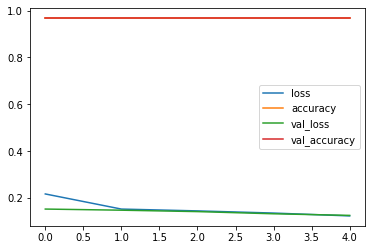

In [ ]:
import matplotlib.pyplot as plt
modelKaybi = pd.DataFrame(a)
modelKaybi.plot()

In [ ]:
tahminDizisi = model.predict(x_test)
tahminDizisi = (tahminDizisi > 0.5)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,tahminDizisi))


In [ ]:
cm = confusion_matrix(y_test,tahminDizisi)
print(cm)


[[967   0]
 [ 33   0]]


In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test,tahminDizisi)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
y_df = pd.DataFrame(y_test)
t_df = pd.Series(tahminDizisi.reshape(1000,))
yeni = pd.concat([y_df,t_df], axis = 1)
yeni.columns = ["Gerçek","Tahmin"]

yeni["Tahmin"] = t_df.astype(int)

yeni["Gerçek"] = yeni["Gerçek"].map({0:"Hata Yok", 1:"Hata Var"})
yeni["Tahmin"] = yeni["Tahmin"].map({0:"Hata Yok", 1:"Hata Var"})

import numpy as np
yeni = yeni.shift()[1:]
yeni.iloc[0:30]


,Gerçek,Tahmin
1,Hata Yok,Hata Yok
2,Hata Yok,Hata Yok
3,Hata Yok,Hata Yok
4,Hata Yok,Hata Yok
5,Hata Yok,Hata Yok
6,Hata Yok,Hata Yok
7,Hata Yok,Hata Yok
8,Hata Yok,Hata Yok
9,Hata Yok,Hata Yok
10,Hata Yok,Hata Yok
